# Intro
이 주피터 노트북은 xAPI 형태의 데이터를 탐색적으로 분석하는데 그 목적이 있음

In [50]:
#Package

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore") # to ignore matplotlib warning
import os
from sys import platform

print('Current WD: ', os.getcwd())
print('Current OS: ', platform)

Current WD:  c:\Users\jhun1\Dropbox\[4]Custom_module\SNURO_xAPI_EDA
Current OS:  win32


# JSON Parsing

In [19]:
#데이터 업로드
json_name = "XAPI_npe_1215.json"
if 'jhun1' in os.getcwd():
    json_path =  os.path.join(r'C:\Users\jhun1\Dropbox\[SNURO_LA]\[100]Data\Unkies\Dummy',
                              json_name)
    
else:
    json_path =  json_name


print(json_path)
with open(json_path, "r", encoding="utf8") as f:
    contents = f.read() #String type
    json_data = json.loads(contents)

C:\Users\jhun1\Dropbox\[SNURO_LA]\[100]Data\Unkies\Dummy\XAPI_npe_1215.json


In [20]:
#json_data의 타입은 list임
#그 안에 xAPI 데이터를 dict형태로 보관하고 있음
#따라서 조회하기 위해서는 리스트 데이터 indexing을 통해 각각의 데이터에 접근하고
#이후 딕셔너리를 조작하는 방식으로 작업해야 함
sample_idx = 2

print(f"{sample_idx}번째 xAPI: ", json_data[sample_idx])
print(f"{sample_idx}번째 xAPI의 Actor의 value: ", json_data[sample_idx]['actor'])

2번째 xAPI:  {'actor': {'mbox': 'mailto:learner10@gmail.com', 'name': 'learner10', 'objectType': 'Agent'}, 'id': 'c7975125-e8c7-3266-be8e-ec78402f29e8', 'object': {'definition': {'name': {'en-US': '삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT)', 'ko-KR': '삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT)'}}, 'id': 'http://127.0.0.1:3000/learner/video/1c9902', 'objectType': 'Activity'}, 'stored': '2021-12-14T18:33:45.010', 'timestamp': '2021-12-14T18:33:45.010', 'verb': {'display': {'en-US': 'play', 'ko-KR': '실행'}, 'id': 'http://adlnet.gov/expapi/verbs/play'}}
2번째 xAPI의 Actor의 value:  {'mbox': 'mailto:learner10@gmail.com', 'name': 'learner10', 'objectType': 'Agent'}


In [21]:
len(json_data) # total length

28767

In [22]:
json_data[sample_idx].keys()

dict_keys(['actor', 'id', 'object', 'stored', 'timestamp', 'verb'])

In [23]:
json_data[sample_idx]['actor'].keys()

dict_keys(['mbox', 'name', 'objectType'])

In [24]:
json_data[sample_idx]['verb'].keys()

dict_keys(['display', 'id'])

In [25]:
json_data[sample_idx]['object'].keys()

dict_keys(['definition', 'id', 'objectType'])

In [17]:
json_data[sample_idx]['id']

'c7975125-e8c7-3266-be8e-ec78402f29e8'

In [27]:
json_data[sample_idx]['stored']

'2021-12-14T18:33:45.010'

In [28]:
json_data[sample_idx]['timestamp']

'2021-12-14T18:33:45.010'

### Parsing할 데이터의 목록
1. actor(name)
2. object - definition - name - ko-KR
3. timestamp
4. verb, display - ko-KR

In [29]:
#데이터를 받을 리스트 준비

#actor에서 name만 추출
actor_list = []
#object에서 definition - name - ko-KR에 있는 데이터만 담기
object_list = []
#verb에서 display - ko-KR만 추출
verb_list = []
#timestamp
timestamp_list = []

In [30]:
#6번에 object 없음
print(json_data[5]['object']['definition']['name']['ko-KR'])

print(json_data[6]['object'] == {})

print(json_data[6])

print(True or False)

삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT)
True
{'actor': {'mbox': 'mailto:learner10@gmail.com', 'name': 'learner10', 'objectType': 'Agent'}, 'id': '88a312df-60bd-30c0-a0ca-9afd862fa0c4', 'object': {}, 'stored': '2021-12-14T18:33:49.432', 'timestamp': '2021-12-14T18:33:49.432', 'verb': {'display': {'en-US': 'quiz_show', 'ko-KR': '퀴즈/메시지 등장'}, 'id': 'http://adlnet.gov/expapi/verbs/quiz_show'}}
True


In [31]:
for i, xapi in enumerate(json_data):

    #object에 있는 결측치를 대체함
    if xapi['object'] == {}:
        json_data[i]['object'] = {'definition': {'name': {'ko-KR': 'none'}}}
    
    actor_var = xapi['actor']['name']
    object_var = xapi['object']['definition']['name']['ko-KR']
    verb_var = xapi['verb']['display']['ko-KR']
    timestamp_var = xapi['timestamp']

    actor_list.append(actor_var)
    object_list.append(object_var)
    verb_list.append(verb_var)
    timestamp_list.append(timestamp_var)

# print(actor_list)
# print(object_list)
# print(verb_list)
# print(timestamp_list)

# Pandas EDM

In [32]:
df_data = pd.DataFrame(
    {
        'actor' : actor_list,
        'object' : object_list,
        'verb' : verb_list,
        'timestamp' : timestamp_list
    }
)

print(df_data.size)

df_data.head(20)

115068


,actor,object,verb,timestamp
0,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청기록,2021-12-14T18:33:42.326
1,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:43.406
2,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),실행,2021-12-14T18:33:45.010
3,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:46.410
4,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:47.424
5,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:48.417
6,learner10,none,퀴즈/메시지 등장,2021-12-14T18:33:49.432
7,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),중지,2021-12-14T18:33:49.433
8,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:49.442
9,learner10,[1c9902] 성공을 위해서 가장 필요하다고 생각하는 것을 한 가지 고른다면?,퀴즈/메시지 응답,2021-12-14T18:33:52.300


In [34]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28767 entries, 0 to 28766
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   actor      28767 non-null  object
 1   object     28767 non-null  object
 2   verb       28767 non-null  object
 3   timestamp  28767 non-null  object
dtypes: object(4)
memory usage: 899.1+ KB


In [8]:
df_data['actor'].unique()

array(['learner10', '6_3_19@g.cnees.kr', 'qwertyuiop', '6_3_5@g.cnees.kr',
       'bonhyuk', '6_3_11@g.cnees.kr', '6_3_13@g.cnees.kr',
       '6_3_9_2@g.cnees.kr', '정윤석', '6_3_2@g.cnees.kr', 'kfc', '임세현',
       '6_3_1@g.cnees.kr', 'g.cnees.kr', 'eunhalim0908',
       '6_3_27@g.cnees.kr', '6_3_12@g.cnees.kr', '6_3_6@g.cnees.kr',
       '6_3_26@g.cnees.kr', '6_3_17@g.cnees.kr', 'jisu0512', '안성민',
       '6_3_18@g.cnees.kr', '6_3_14@g.cnees.kr', '6_3_20@g.cnees.kr',
       '6_3_8@g.cnees.kr', 'npe#31'], dtype=object)

In [9]:
df_data['object'].unique()

#삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT) - 영상
#[1c9902] 성공을 위해서 가장 필요하다고 생각하는 것을 한 가지 고른다면? - 퀴즈(앞)
#[1c9902]  IQ, 재능, 환경을 뛰어넘는 열정적 끈기의 힘을 의미하는 단어는 무엇인가요?'] - 퀴즈(뒤)
#none - 결측치

array(['삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT)', 'none',
       '[1c9902] 성공을 위해서 가장 필요하다고 생각하는 것을 한 가지 고른다면?',
       '[1c9902]  IQ, 재능, 환경을 뛰어넘는 열정적 끈기의 힘을 의미하는 단어는 무엇인가요?'],
      dtype=object)

In [10]:
df_data['verb'].unique()

array(['시청기록', '시청중', '실행', '퀴즈/메시지 등장', '중지', '퀴즈/메시지 응답', '재생바 클릭',
       '강의 평가 등장', '강의 평가 제출'], dtype=object)

In [11]:
#결측 확인
df_data.isnull().sum()

actor        0
object       0
verb         0
timestamp    0
dtype: int64

In [38]:
#actor 중 learner10 행 삭제(실제 학생 아님)

del_index_actor = df_data[df_data['actor'] == "learner10"].index
df_data_clean = df_data.drop(del_index_actor)

df_data_clean['actor'].unique()

array(['6_3_19@g.cnees.kr', 'qwertyuiop', '6_3_5@g.cnees.kr', 'bonhyuk',
       '6_3_11@g.cnees.kr', '6_3_13@g.cnees.kr', '6_3_9_2@g.cnees.kr',
       '정윤석', '6_3_2@g.cnees.kr', 'kfc', '임세현', '6_3_1@g.cnees.kr',
       'g.cnees.kr', 'eunhalim0908', '6_3_27@g.cnees.kr',
       '6_3_12@g.cnees.kr', '6_3_6@g.cnees.kr', '6_3_26@g.cnees.kr',
       '6_3_17@g.cnees.kr', 'jisu0512', '안성민', '6_3_18@g.cnees.kr',
       '6_3_14@g.cnees.kr', '6_3_20@g.cnees.kr', '6_3_8@g.cnees.kr',
       'npe#31'], dtype=object)

### 1. 활동량 분석

In [39]:
#활동량 분석
#각각의 학생별로 총 로그 수를 계산

student_total_logs = {}

for student in df_data_clean['actor'].unique():
    student_total_logs[student] = len(df_data_clean[df_data_clean['actor'] == student])

print(student_total_logs)

{'6_3_19@g.cnees.kr': 1231, 'qwertyuiop': 1831, '6_3_5@g.cnees.kr': 1476, 'bonhyuk': 1485, '6_3_11@g.cnees.kr': 1230, '6_3_13@g.cnees.kr': 1303, '6_3_9_2@g.cnees.kr': 727, '정윤석': 1240, '6_3_2@g.cnees.kr': 1614, 'kfc': 1382, '임세현': 1247, '6_3_1@g.cnees.kr': 1225, 'g.cnees.kr': 1116, 'eunhalim0908': 971, '6_3_27@g.cnees.kr': 1273, '6_3_12@g.cnees.kr': 1204, '6_3_6@g.cnees.kr': 1052, '6_3_26@g.cnees.kr': 159, '6_3_17@g.cnees.kr': 1253, 'jisu0512': 654, '안성민': 1010, '6_3_18@g.cnees.kr': 97, '6_3_14@g.cnees.kr': 704, '6_3_20@g.cnees.kr': 634, '6_3_8@g.cnees.kr': 1264, 'npe#31': 1359}


In [40]:
print(sorted(student_total_logs.items(), key = lambda x: x[1], reverse = True))

[('qwertyuiop', 1831), ('6_3_2@g.cnees.kr', 1614), ('bonhyuk', 1485), ('6_3_5@g.cnees.kr', 1476), ('kfc', 1382), ('npe#31', 1359), ('6_3_13@g.cnees.kr', 1303), ('6_3_27@g.cnees.kr', 1273), ('6_3_8@g.cnees.kr', 1264), ('6_3_17@g.cnees.kr', 1253), ('임세현', 1247), ('정윤석', 1240), ('6_3_19@g.cnees.kr', 1231), ('6_3_11@g.cnees.kr', 1230), ('6_3_1@g.cnees.kr', 1225), ('6_3_12@g.cnees.kr', 1204), ('g.cnees.kr', 1116), ('6_3_6@g.cnees.kr', 1052), ('안성민', 1010), ('eunhalim0908', 971), ('6_3_9_2@g.cnees.kr', 727), ('6_3_14@g.cnees.kr', 704), ('jisu0512', 654), ('6_3_20@g.cnees.kr', 634), ('6_3_26@g.cnees.kr', 159), ('6_3_18@g.cnees.kr', 97)]


['qwertyuiop', '6_3_2@g.cnees.kr', 'bonhyuk', '6_3_5@g.cnees.kr', 'kfc', 'npe#31', '6_3_13@g.cnees.kr', '6_3_27@g.cnees.kr', '6_3_8@g.cnees.kr', '6_3_17@g.cnees.kr', '임세현', '정윤석', '6_3_19@g.cnees.kr', '6_3_11@g.cnees.kr', '6_3_1@g.cnees.kr', '6_3_12@g.cnees.kr', 'g.cnees.kr', '6_3_6@g.cnees.kr', '안성민', 'eunhalim0908', '6_3_9_2@g.cnees.kr', '6_3_14@g.cnees.kr', 'jisu0512', '6_3_20@g.cnees.kr', '6_3_26@g.cnees.kr', '6_3_18@g.cnees.kr']
[1831, 1614, 1485, 1476, 1382, 1359, 1303, 1273, 1264, 1253, 1247, 1240, 1231, 1230, 1225, 1204, 1116, 1052, 1010, 971, 727, 704, 654, 634, 159, 97]


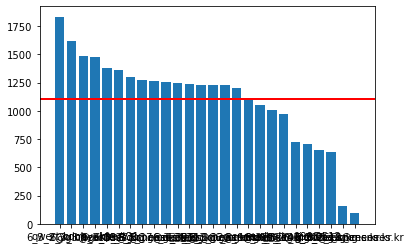

In [51]:
student_total_logs_sorted = sorted(student_total_logs.items(), key = lambda x: x[1], reverse = True)

students = []
total_logs = []

for stu, log in student_total_logs_sorted:
    students.append(stu)
    total_logs.append(log)

print(students)
print(total_logs)

fig, ax = plt.subplots()
ax.bar(x= students,
       height= total_logs)
plt.axhline(np.array(total_logs).mean(), 
            color = 'red',
            linewidth=2)

plt.show()

### 2. 시청 시간 분석

In [52]:
df_data_clean['verb'].unique()

verb_counts = {}

for v in df_data_clean['verb'].unique():
    verb_counts[v] = len(df_data[df_data['verb'] == v])

print(verb_counts)

{'시청기록': 39, '시청중': 27142, '실행': 315, '중지': 508, '퀴즈/메시지 등장': 64, '퀴즈/메시지 응답': 62, '재생바 클릭': 11, '강의 평가 등장': 400, '강의 평가 제출': 226}


먼저 전체 시청중을 plot으로 그려보기

In [53]:
#시청 중만 추린 판다스 데이터 프레임 만들기
student_total_watching_pd = df_data_clean[df_data_clean['verb'] == '시청중']
student_total_watching_pd.head()

,actor,object,verb,timestamp
27,6_3_19@g.cnees.kr,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-15T08:53:40.485
29,6_3_19@g.cnees.kr,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-15T08:53:43.509
30,6_3_19@g.cnees.kr,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-15T08:53:44.526
31,6_3_19@g.cnees.kr,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-15T08:53:45.532
32,6_3_19@g.cnees.kr,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-15T08:53:46.540


In [54]:
student_total_watching_logs = {}

for student in df_data_clean['actor'].unique():
    #각 학생별 갯수를 넣기(전체 시청 중 데이터 중에서 각 학생들이 속한 갯수를 확인하면 됨)
    #전항에는 딕셔너리로 표시
    #후항에는 전체 시청 중 데이터 중에서 각 학생별 데이터 확인
    student_total_watching_logs[student] = len(student_total_watching_pd[student_total_watching_pd['actor'] == student])

print('학생별 시청중 갯수: ', student_total_watching_logs)

학생별 시청중 갯수:  {'6_3_19@g.cnees.kr': 1216, 'qwertyuiop': 1800, '6_3_5@g.cnees.kr': 1195, 'bonhyuk': 1198, '6_3_11@g.cnees.kr': 1200, '6_3_13@g.cnees.kr': 1203, '6_3_9_2@g.cnees.kr': 712, '정윤석': 1197, '6_3_2@g.cnees.kr': 1590, 'kfc': 1236, '임세현': 1195, '6_3_1@g.cnees.kr': 1197, 'g.cnees.kr': 1085, 'eunhalim0908': 950, '6_3_27@g.cnees.kr': 1215, '6_3_12@g.cnees.kr': 1194, '6_3_6@g.cnees.kr': 1028, '6_3_26@g.cnees.kr': 144, '6_3_17@g.cnees.kr': 1195, 'jisu0512': 624, '안성민': 941, '6_3_18@g.cnees.kr': 82, '6_3_14@g.cnees.kr': 681, '6_3_20@g.cnees.kr': 606, '6_3_8@g.cnees.kr': 1237, 'npe#31': 1206}


In [55]:
print(sorted(student_total_watching_logs.items(), key = lambda x: x[1], reverse = True))

[('qwertyuiop', 1800), ('6_3_2@g.cnees.kr', 1590), ('6_3_8@g.cnees.kr', 1237), ('kfc', 1236), ('6_3_19@g.cnees.kr', 1216), ('6_3_27@g.cnees.kr', 1215), ('npe#31', 1206), ('6_3_13@g.cnees.kr', 1203), ('6_3_11@g.cnees.kr', 1200), ('bonhyuk', 1198), ('정윤석', 1197), ('6_3_1@g.cnees.kr', 1197), ('6_3_5@g.cnees.kr', 1195), ('임세현', 1195), ('6_3_17@g.cnees.kr', 1195), ('6_3_12@g.cnees.kr', 1194), ('g.cnees.kr', 1085), ('6_3_6@g.cnees.kr', 1028), ('eunhalim0908', 950), ('안성민', 941), ('6_3_9_2@g.cnees.kr', 712), ('6_3_14@g.cnees.kr', 681), ('jisu0512', 624), ('6_3_20@g.cnees.kr', 606), ('6_3_26@g.cnees.kr', 144), ('6_3_18@g.cnees.kr', 82)]


['qwertyuiop', '6_3_2@g.cnees.kr', '6_3_8@g.cnees.kr', 'kfc', '6_3_19@g.cnees.kr', '6_3_27@g.cnees.kr', 'npe#31', '6_3_13@g.cnees.kr', '6_3_11@g.cnees.kr', 'bonhyuk', '정윤석', '6_3_1@g.cnees.kr', '6_3_5@g.cnees.kr', '임세현', '6_3_17@g.cnees.kr', '6_3_12@g.cnees.kr', 'g.cnees.kr', '6_3_6@g.cnees.kr', 'eunhalim0908', '안성민', '6_3_9_2@g.cnees.kr', '6_3_14@g.cnees.kr', 'jisu0512', '6_3_20@g.cnees.kr', '6_3_26@g.cnees.kr', '6_3_18@g.cnees.kr']
[1800, 1590, 1237, 1236, 1216, 1215, 1206, 1203, 1200, 1198, 1197, 1197, 1195, 1195, 1195, 1194, 1085, 1028, 950, 941, 712, 681, 624, 606, 144, 82]


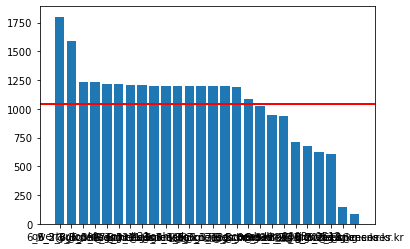

In [60]:
student_total_watching_logs_sorted = sorted(student_total_watching_logs.items(), key = lambda x: x[1], reverse = True)

watching_students = []
watching_logs = []

for stu, log in student_total_watching_logs_sorted:
    watching_students.append(stu)
    watching_logs.append(log)

print(watching_students)
print(watching_logs)


fig, ax = plt.subplots()
ax.bar(x= watching_students,
       height= watching_logs)
plt.axhline(np.array(watching_logs).mean(), 
            color = 'red',
            linewidth=2)

plt.show()

1. 전체 시청중 확인을 통해 시청중 로그 갯수의 비중이 가장 높기에, 활동량과 시청중 분석량이 비슷하다는 것을 알 수 있음
2. 이를 통해 완료율을 대략 짐작할 수 있음
3. 크게 3가지 군으로 나누어 볼 수 있음(초과학습, 완료, 미완료)

In [23]:
#qwertyuiop와 6_3_18@g.cnees.kr 두 명을 중심으로 분석해보기

#qwertyuiop의 데이터

df_data_qwertyuiop = df_data_clean[df_data_clean['actor'] == "qwertyuiop"]

df_data_qwertyuiop.head()

,actor,object,verb,timestamp
128,qwertyuiop,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청기록,2021-12-15T08:55:26.244
131,qwertyuiop,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-15T08:55:28.352
136,qwertyuiop,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),실행,2021-12-15T08:55:32.097
138,qwertyuiop,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-15T08:55:33.388
140,qwertyuiop,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-15T08:55:34.406


In [24]:
#6_3_18@g.cnees.kr의 데이터

df_data_6_3_18 = df_data_clean[df_data_clean['actor'] == "6_3_18@g.cnees.kr"]

df_data_6_3_18.head()

,actor,object,verb,timestamp
14551,6_3_18@g.cnees.kr,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청기록,2021-12-15T09:16:16.968
14590,6_3_18@g.cnees.kr,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-15T09:16:19.235
14661,6_3_18@g.cnees.kr,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),실행,2021-12-15T09:16:23.151
14721,6_3_18@g.cnees.kr,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-15T09:16:26.272
14741,6_3_18@g.cnees.kr,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-15T09:16:27.284


In [25]:
#나중에 함수로 변경해서 사용하기

#qwertyuiop의 verb 값

df_data_qwertyuiop_verb_counts = {}

for v in df_data_qwertyuiop['verb'].unique():
    df_data_qwertyuiop_verb_counts[v] = len(df_data_qwertyuiop[df_data_qwertyuiop['verb'] == v])

print(df_data_qwertyuiop_verb_counts)

{'시청기록': 3, '시청중': 1800, '실행': 7, '중지': 7, '퀴즈/메시지 등장': 3, '퀴즈/메시지 응답': 3, '재생바 클릭': 2, '강의 평가 등장': 4, '강의 평가 제출': 2}


In [26]:
#6_3_18@g.cnees.kr의 verb 값

df_data_6_3_18_verb_counts = {}

for v in df_data_6_3_18['verb'].unique():
    df_data_6_3_18_verb_counts[v] = len(df_data_6_3_18[df_data_6_3_18['verb'] == v])

print(df_data_6_3_18_verb_counts)

{'시청기록': 1, '시청중': 82, '실행': 3, '중지': 4, '퀴즈/메시지 등장': 2, '퀴즈/메시지 응답': 2, '강의 평가 등장': 2, '강의 평가 제출': 1}


### 3. 퀴즈 정답여부 분석

In [139]:
#현재 축적된 데이터에서는 정오답 여부가 기록되지 않았음

### 4. ML model examples

그리 많은 데이터가 있는 것은 아니기에, 큰 의미는 없지만, 예시로서 활용하기 바람

{'시청기록': 1, '시청중': 82, '실행': 3, '중지': 4, '퀴즈/메시지 등장': 2, '퀴즈/메시지 응답': 2, '강의 평가 등장': 2, '강의 평가 제출': 1}으로 예측 가능한지 일단 돌려보기

종속변수는 성실도 상, 중, 하를 임의로 설정하고 해보기(사람이 성실도 기입)

In [28]:
print(students)

['qwertyuiop', '6_3_2@g.cnees.kr', 'bonhyuk', '6_3_5@g.cnees.kr', 'kfc', 'npe#31', '6_3_13@g.cnees.kr', '6_3_27@g.cnees.kr', '6_3_8@g.cnees.kr', '6_3_17@g.cnees.kr', '임세현', '정윤석', '6_3_19@g.cnees.kr', '6_3_11@g.cnees.kr', '6_3_1@g.cnees.kr', '6_3_12@g.cnees.kr', 'g.cnees.kr', '6_3_6@g.cnees.kr', '안성민', 'eunhalim0908', '6_3_9_2@g.cnees.kr', '6_3_14@g.cnees.kr', 'jisu0512', '6_3_20@g.cnees.kr', '6_3_26@g.cnees.kr', '6_3_18@g.cnees.kr', 'average']


In [80]:
#그냥 순서에 맞게 리스트로 변수 할당하면 됨

#빈 리스트 만들기
features = [ [] for i in range(len(df_data_clean['verb'].unique()))]

print(features)

df_data_clean_unique = df_data_clean['verb'].unique()

print(df_data_clean_unique)

for actor_unique in df_data_clean['actor'].unique():

    df_actor = df_data_clean[df_data_clean['actor'] == actor_unique]

    for i, verb_unique in enumerate(df_data_clean['verb'].unique()):
        features[i].append(len(df_actor[df_actor['verb'] == df_data_clean_unique[i]]))

print(features)

print(len(features[0]))

[[], [], [], [], [], [], [], [], []]
['시청기록' '시청중' '실행' '중지' '퀴즈/메시지 등장' '퀴즈/메시지 응답' '재생바 클릭' '강의 평가 등장'
 '강의 평가 제출']
[[1, 3, 1, 1, 1, 2, 1, 1, 3, 2, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1], [1216, 1800, 1195, 1198, 1200, 1203, 712, 1197, 1590, 1236, 1195, 1197, 1085, 950, 1215, 1194, 1028, 144, 1195, 624, 941, 82, 681, 606, 1237, 1206], [3, 7, 47, 48, 7, 17, 3, 9, 7, 25, 8, 6, 10, 6, 21, 3, 5, 3, 11, 5, 13, 3, 7, 7, 5, 26], [4, 7, 91, 91, 10, 31, 4, 14, 4, 47, 16, 9, 8, 7, 24, 2, 7, 4, 19, 9, 22, 4, 6, 8, 8, 49], [2, 3, 2, 2, 2, 3, 2, 2, 4, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2], [2, 3, 2, 2, 2, 3, 2, 2, 4, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2], [0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [2, 4, 89, 87, 6, 27, 2, 10, 0, 43, 14, 6, 1, 2, 6, 0, 4, 2, 16, 7, 18, 2, 0, 2, 6, 44], [1, 2, 49, 56, 2, 16, 1, 5, 0, 22, 7, 2, 1, 1, 2, 0, 2, 1, 7, 4, 11, 1, 0, 1, 3, 29]]
26


In [85]:
scores = [3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 2, 3, 1, 2, 2, 1, 2, 1, 1, 1]

features.append(scores)

print(features)

pd_features = pd.DataFrame(features)

pd_features = pd_features.transpose()

pd_features.head()

[[1, 3, 1, 1, 1, 2, 1, 1, 3, 2, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1], [1216, 1800, 1195, 1198, 1200, 1203, 712, 1197, 1590, 1236, 1195, 1197, 1085, 950, 1215, 1194, 1028, 144, 1195, 624, 941, 82, 681, 606, 1237, 1206], [3, 7, 47, 48, 7, 17, 3, 9, 7, 25, 8, 6, 10, 6, 21, 3, 5, 3, 11, 5, 13, 3, 7, 7, 5, 26], [4, 7, 91, 91, 10, 31, 4, 14, 4, 47, 16, 9, 8, 7, 24, 2, 7, 4, 19, 9, 22, 4, 6, 8, 8, 49], [2, 3, 2, 2, 2, 3, 2, 2, 4, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2], [2, 3, 2, 2, 2, 3, 2, 2, 4, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2], [0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [2, 4, 89, 87, 6, 27, 2, 10, 0, 43, 14, 6, 1, 2, 6, 0, 4, 2, 16, 7, 18, 2, 0, 2, 6, 44], [1, 2, 49, 56, 2, 16, 1, 5, 0, 22, 7, 2, 1, 1, 2, 0, 2, 1, 7, 4, 11, 1, 0, 1, 3, 29], [3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 2, 3, 1, 2, 2, 1, 2, 1, 1, 1], [3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 2, 3, 1, 2, 2, 1, 2, 1, 1, 1], [3, 2, 2, 2, 2,

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1216,3,4,2,2,0,2,1,3,3,3
1,3,1800,7,7,3,3,2,4,2,2,2,2
2,1,1195,47,91,2,2,0,89,49,2,2,2
3,1,1198,48,91,2,2,0,87,56,2,2,2
4,1,1200,7,10,2,2,0,6,2,2,2,2


In [91]:
#이중 리스트 만들기
#직접 넣어봐야해서 하드코딩할 수 밖에 없음
#3점 성실도 최고, 2점 보통, 1점 성실도 노력 필요(더미로 만든 데이터임)
tagging_name = ['qwertyuiop', '6_3_2@g.cnees.kr', 'bonhyuk', '6_3_5@g.cnees.kr', 'kfc', 'npe#31', '6_3_13@g.cnees.kr', '6_3_27@g.cnees.kr', '6_3_8@g.cnees.kr', '6_3_17@g.cnees.kr', '임세현', '정윤석', '6_3_19@g.cnees.kr', '6_3_11@g.cnees.kr', '6_3_1@g.cnees.kr', '6_3_12@g.cnees.kr', 'g.cnees.kr', '6_3_6@g.cnees.kr', '안성민', 'eunhalim0908', '6_3_9_2@g.cnees.kr', '6_3_14@g.cnees.kr', 'jisu0512', '6_3_20@g.cnees.kr', '6_3_26@g.cnees.kr', '6_3_18@g.cnees.kr']

x_data = pd_features.loc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
y_data = pd_features.loc[:, [11]]

In [92]:
x_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1216,3,4,2,2,0,2,1,3,3
1,3,1800,7,7,3,3,2,4,2,2,2
2,1,1195,47,91,2,2,0,89,49,2,2
3,1,1198,48,91,2,2,0,87,56,2,2
4,1,1200,7,10,2,2,0,6,2,2,2


In [93]:
y_data.head()

,11
0,3
1,2
2,2
3,2
4,2


In [122]:
from sklearn.model_selection import train_test_split
#데이터 분류하기(훈련, 테스트셋)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.6, random_state=42)

In [123]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5)


In [124]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=5)

In [126]:
#결과가 너무 복불복인데, 데이터의 양이 적기에 어쩔 수 없음

print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)) )

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.938
